In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data= pd.read_csv('popdata.csv', parse_dates=True)
df = data[data['pop_name'] == "Aceros waldeni (Visayan Writhed Hornbill)"]
df = df[['pop_date','population_no']]
df['pop_date'] = pd.to_datetime(df['pop_date'])
df = df.groupby('pop_date')['population_no'].sum().reset_index()
df = df.set_index('pop_date')
df.index

DatetimeIndex(['2016-01-04', '2016-02-01', '2016-03-07', '2016-04-04',
               '2016-05-02', '2016-06-06', '2016-07-04', '2016-08-01',
               '2016-09-05', '2016-10-03', '2016-11-07', '2016-12-05',
               '2017-01-03', '2017-02-06', '2017-03-06', '2017-04-03',
               '2017-05-02', '2017-06-05', '2017-07-03', '2017-08-07',
               '2017-09-04', '2017-10-02', '2017-11-06', '2017-12-04',
               '2018-01-03', '2018-02-05', '2018-03-05', '2018-04-02',
               '2018-05-07', '2018-06-04', '2018-07-02', '2018-08-06',
               '2018-09-03', '2018-10-01', '2018-11-05', '2018-12-07',
               '2019-01-07', '2019-02-04', '2019-03-04', '2019-04-01',
               '2019-05-06', '2019-06-03', '2019-07-01', '2019-08-05',
               '2019-09-02', '2019-10-07', '2019-11-04', '2019-12-02',
               '2020-01-06', '2020-02-03', '2020-03-02', '2020-04-06',
               '2020-05-04', '2020-06-01', '2020-07-06', '2020-08-03',
      

In [3]:
y = df['population_no'].resample('M').mean()

In [4]:
y['2016':]

pop_date
2016-01-31     7.0
2016-02-29     8.0
2016-03-31     8.0
2016-04-30     8.0
2016-05-31     7.0
              ... 
2021-07-31    13.0
2021-08-31    14.0
2021-09-30    14.0
2021-10-31    14.0
2021-11-30    14.0
Freq: M, Name: population_no, Length: 71, dtype: float64

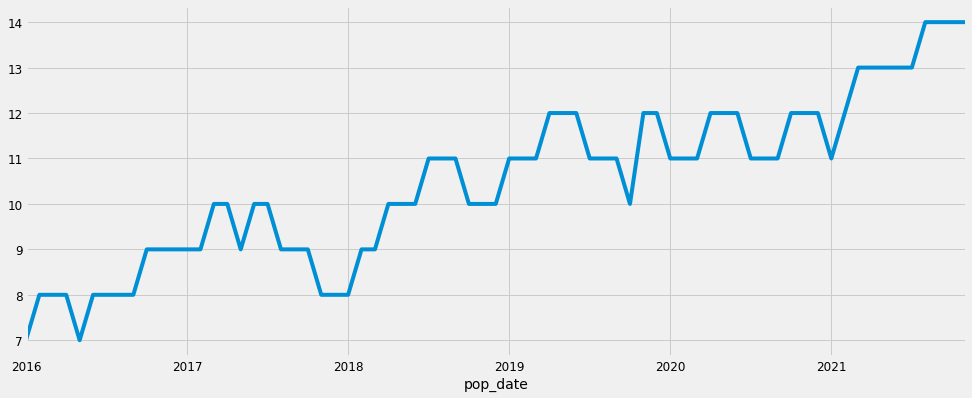

In [5]:
y.plot(figsize=(15, 6))
plt.show()

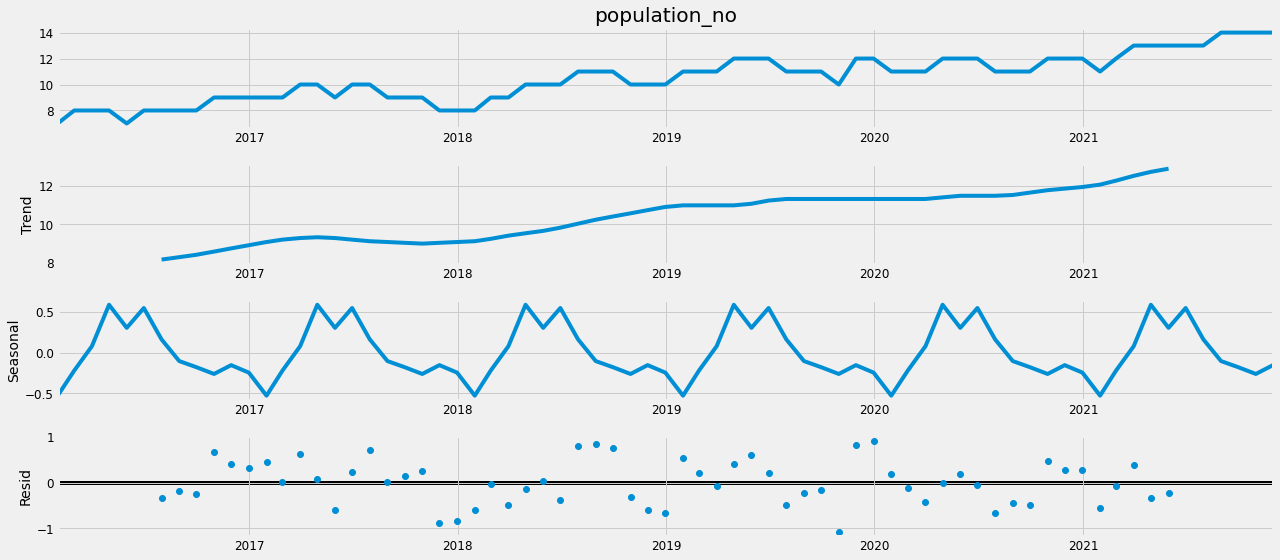

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:532.1238555803753


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:448.3344735295008
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:211.13337200358364
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:169.41712034344513
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:186.83232236430536
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:158.5504457713748
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:172.44605891636294
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:165.7567818214572
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:438.2456337775543


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:370.39723181231966
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:172.8651923297397
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:140.9199419096299


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:189.57942631210312


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:160.0221177138997
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:145.3272093038731
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:141.1701442222543
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:135.58227997541385
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:118.03423531041403
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:144.97867832124976
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:109.39077880293708
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:118.28183692478189
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:118.76707545612156
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:119.26418864407644
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:111.39074631133872
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:134.53756893967977
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:115.00207545128984
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:142.12072980748786
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:105.48496961309017
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:118.8122399750433
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:116.48176341929273
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:118.29227561078

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:121.33779778500552
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:144.7871560698411
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:112.53964645653022
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:119.86022625230139
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:121.46622393706379
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:118.52491882225912
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:114.53961460890102
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:135.4862593761167


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:120.45461674681576
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:143.9109327272025
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:108.91622735798363
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:119.84660527596664
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:120.85649942497753
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:119.70494981961582
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:110.910691766617
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:136.20910031922963
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:118.92031371959132
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:145.33320323074958
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:109.95580614440087
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:118.2991142337068
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:120.18933622096716
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:117.91604365157586
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:111.95580465687651
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:135.60342418316543
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:116.0185822749159
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:140.603825800440

In [9]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4846      0.176      2.751      0.006       0.139       0.830
ma.L1         -1.0000   1315.889     -0.001      0.999   -2580.095    2578.095
ma.S.L12      -1.0002    476.135     -0.002      0.998    -934.208     932.208
sigma2         0.3528    439.147      0.001      0.999    -860.360     861.065


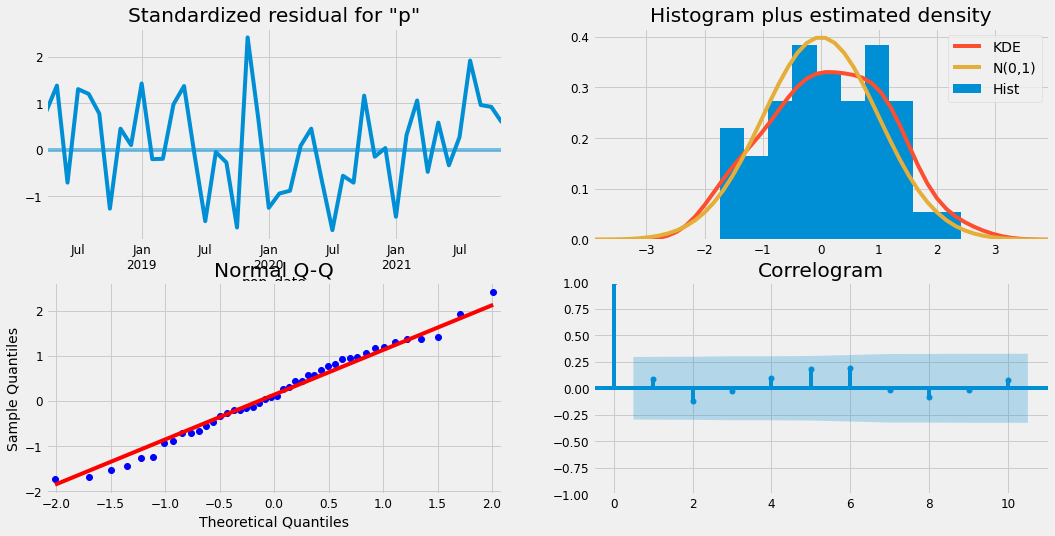

In [10]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

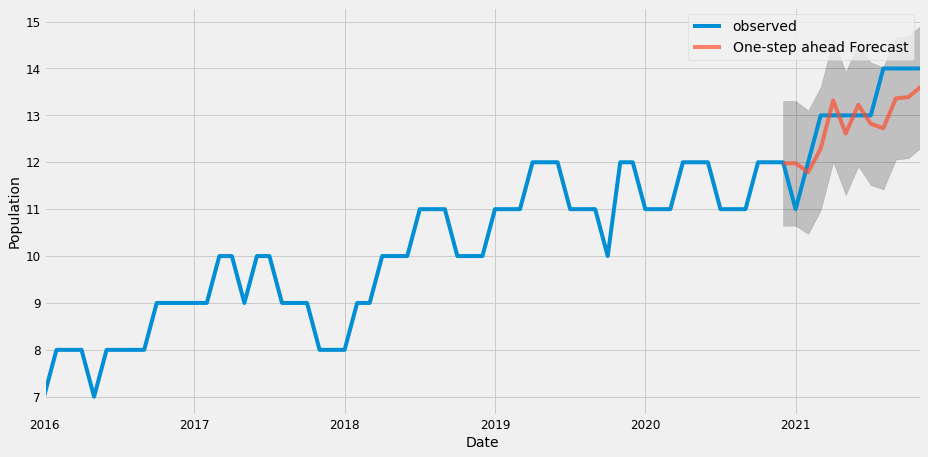

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()

In [12]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-12-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.37


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.61


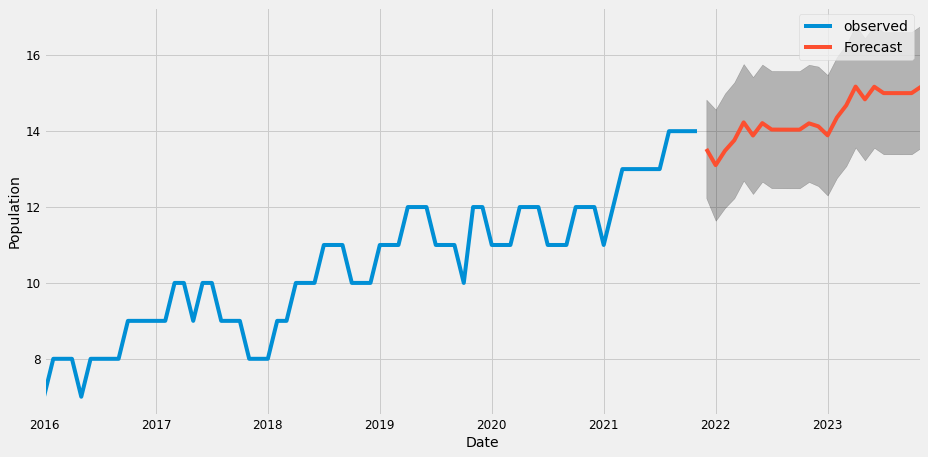

In [14]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()

In [15]:
pred_uc.predicted_mean

2021-12-31    13.531265
2022-01-31    13.104098
2022-02-28    13.484596
2022-03-31    13.760015
2022-04-30    14.231947
2022-05-31    13.885011
2022-06-30    14.211752
2022-07-31    14.041890
2022-08-31    14.040342
2022-09-30    14.039591
2022-10-31    14.039228
2022-11-30    14.205718
2022-12-31    14.127510
2023-01-31    13.889608
2023-02-28    14.361831
2023-03-31    14.681702
2023-04-30    15.175178
2023-05-31    14.838683
2023-06-30    15.170484
2023-07-31    15.003075
2023-08-31    15.002715
2023-09-30    15.002541
2023-10-31    15.002456
2023-11-30    15.169082
Freq: M, Name: predicted_mean, dtype: float64